In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_url_mentions(datestr, translation):
    return "http://data.gdeltproject.org/gdeltv2/{}{}.mentions.CSV.zip".format(datestr, ".translation" if translation else "")

def get_url_events(datestr, translation):
    return "http://data.gdeltproject.org/gdeltv2/{}{}.export.CSV.zip".format(datestr, ".translation" if translation else "")

def read_csv(url):
    return pd.read_csv(url, sep='\t', header=None, usecols=[0], names=['event_id'])

We ran the analysis for the 21st of November.

In [3]:
def dates_generator():
    for hour in range(0, 24):
        for minutes in [0, 15, 30, 45]:
            yield "20181121{}{}00".format(str(hour).zfill(2), str(minutes).zfill(2))

In [4]:
def analysis(translation=True):
    nb_mentions = []
    nb_events = []
    nb_in_common = []

    for date in dates_generator():
        try:
            mentions = read_csv(get_url_mentions(date, translation))
            events = read_csv(get_url_events(date, translation))
            merged = mentions.merge(events, on='event_id')

            nb_mentions.append(mentions.shape[0])
            nb_events.append(events.shape[0])
            nb_in_common.append(merged.shape[0])
        except:
            pass
    
    return pd.DataFrame.from_dict({'nb_mentions': nb_mentions, 
                                   'nb_events': nb_events, 
                                   'nb_mentions_with_event': [n_com for n_com in nb_in_common]})

In [5]:
df_translation = analysis(True)
df_not_translation = analysis(False)

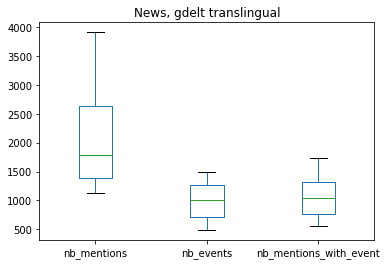

In [6]:
df_translation.plot.box()
null = plt.title("News, gdelt translingual")

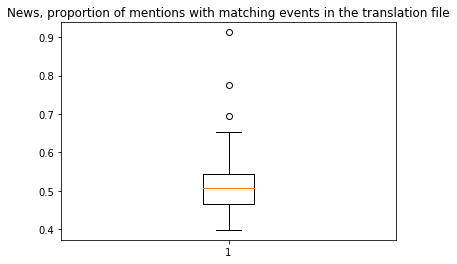

In [11]:
plt.boxplot((df_translation.nb_mentions_with_event / df_translation.nb_mentions))
null = plt.title("News, proportion of mentions with matching events in the translation file")

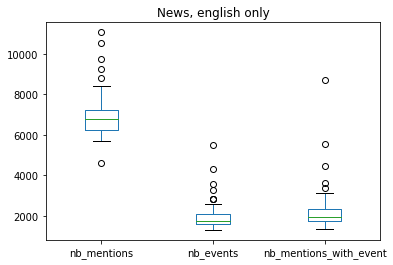

In [12]:
df_not_translation.plot.box()
null = plt.title("News, english only")

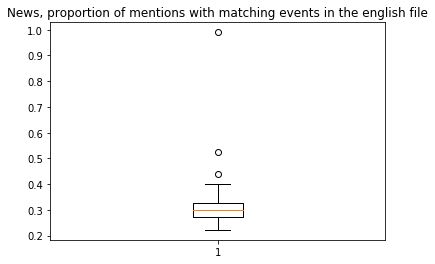

In [13]:
plt.boxplot((df_not_translation.nb_mentions_with_event / df_not_translation.nb_mentions))
null = plt.title("News, proportion of mentions with matching events in the english file")